This notebook loads a saved Wildfire Detection model, and steps through a directory of test image files passing each image to the model for classification. It prints each image, it's filename and its prediction. The model  uses Xception as a trained base, adds a head and trains with a dataset of 31,000 299x299 images - half containing smoke and half no smoke. It was created using Keras & TensorFlow. 

In [1]:
# Setup
from tensorflow import keras
import tensorflow as tf
from keras.models import load_model
import numpy as np


In [3]:
# load saved model - NOTE: this takes a minute to load (it's 100mb)!
#model = tf.keras.models.load_model('MediumXception')
model = keras.models.load_model('LargeXception', compile=True)
# model = keras.models.load_model('MediumXception')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               52429056  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 73,290,793
Trainable params: 73,236,265
Non-trainable params: 54,528
_________________________________________________________________


In [4]:
def displayMyImage(name):
    image_path = name
    image_size = (299,299)
    img = cv2.imread(image_path) # with the OpenCV function imread(), the order of colors is BGR (blue, green, red).
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB for Pillow
    display(Image.fromarray(img))

def getMyPrediction(name,model):
    image = tf.keras.preprocessing.image.load_img(name)
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch. 
    # Note: Xception expects a specific kind of input processing.
    # Before passing inputs to the model, call tf.keras.applications.xception.preprocess_input. 
    # It will scale scale input pixels between -1 and 1.
    x = preprocess_input(input_arr)
    predictions = model.predict(x)
    if predictions[0][0] <= 0.5:
        print("The image contains no smoke.")
    if predictions[0][0] > 0.5:
        print("The image contains smoke.")
    print(predictions[0][0])


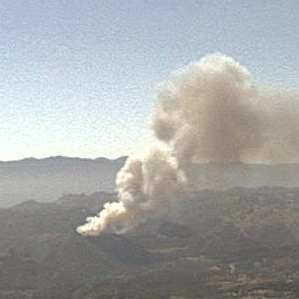

C:\Users\mthor\Unsynced Documents\HPWREN-FigLib_Output2\1528841646_+00660_centered_1.jpg
The image contains smoke.
1.0


In [5]:
import os
from PIL import Image
import cv2 
from IPython.display import display
from tensorflow.keras.applications.xception import preprocess_input
# Get a prediction on a single 299x299 image
# name = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\subimages\splitted_38.jpg' #split subimage
name = r'C:\Users\mthor\Unsynced Documents\HPWREN-FigLib_Output2\1528841646_+00660_centered_1.jpg'
displayMyImage(name)
print(name)
getMyPrediction(name,model)

In [ ]:
 # Get a prediction on a single 299x299 image
name = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest\Whittier3-smoke.jpg'

displayMyImage(name)
print(name)
getMyPrediction(name,model)

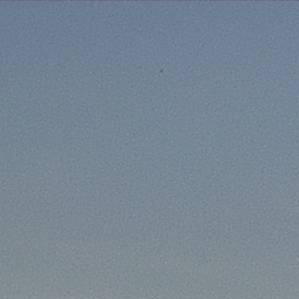

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_0.jpg
The image contains no smoke.
7.74934e-22


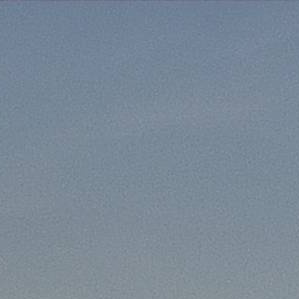

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_1.jpg
The image contains no smoke.
7.582973e-23


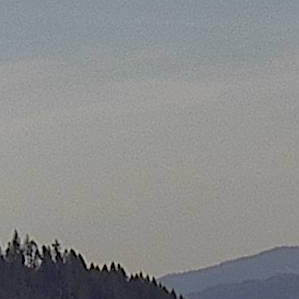

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_10.jpg
The image contains no smoke.
0.0054453015


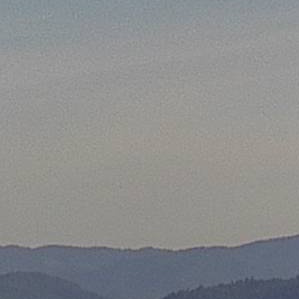

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_11.jpg
The image contains no smoke.
1.2496857e-05


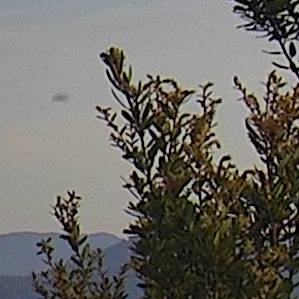

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_12.jpg
The image contains no smoke.
1.05549184e-07


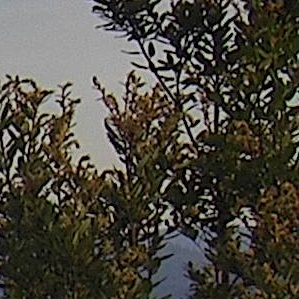

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_13.jpg
The image contains no smoke.
1.7843933e-08


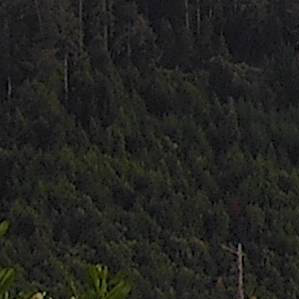

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_14.jpg
The image contains no smoke.
0.00013846159


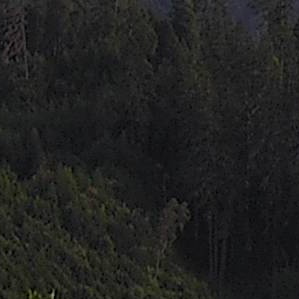

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_15.jpg
The image contains no smoke.
3.870666e-10


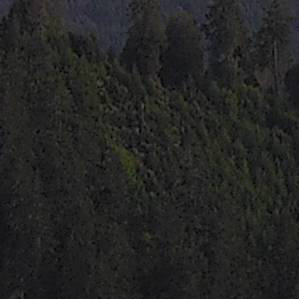

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_16.jpg
The image contains no smoke.
3.1469294e-15


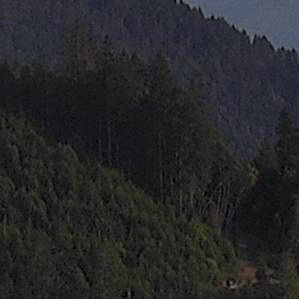

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_17.jpg
The image contains no smoke.
3.6846365e-07


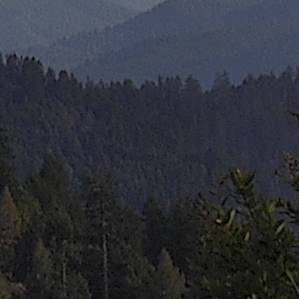

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_18.jpg
The image contains no smoke.
1.756511e-08


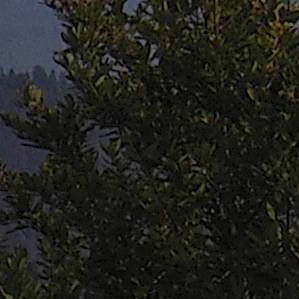

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_19.jpg
The image contains no smoke.
8.936784e-08


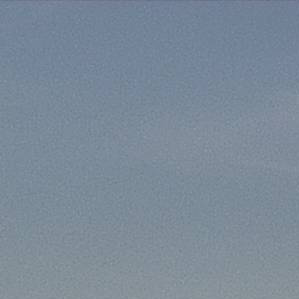

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_2.jpg
The image contains no smoke.
4.0230774e-24


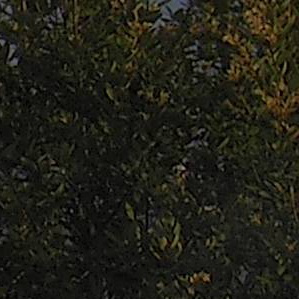

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_20.jpg
The image contains no smoke.
1.6866758e-09


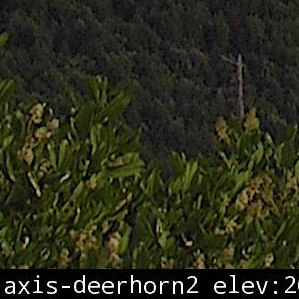

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_21.jpg
The image contains no smoke.
8.480999e-05


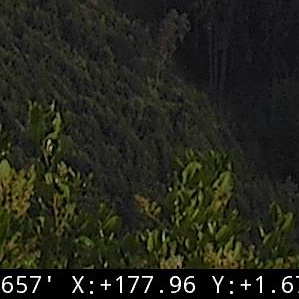

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_22.jpg
The image contains no smoke.
1.066758e-05


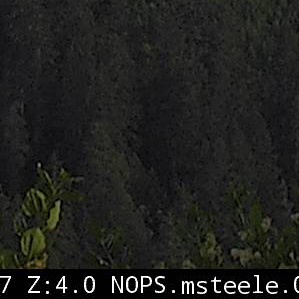

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_23.jpg
The image contains no smoke.
5.266785e-09


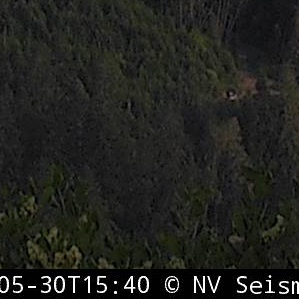

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_24.jpg
The image contains no smoke.
1.8888466e-13


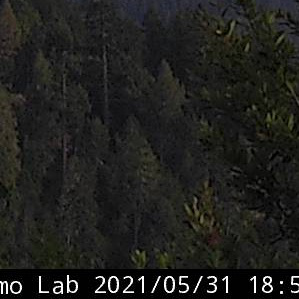

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_25.jpg
The image contains no smoke.
6.286196e-11


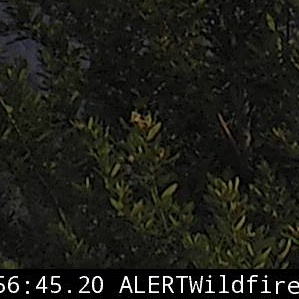

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_26.jpg
The image contains smoke.
0.79740477


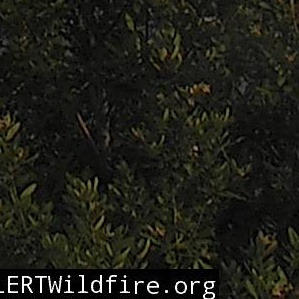

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_27.jpg
The image contains no smoke.
0.00916779


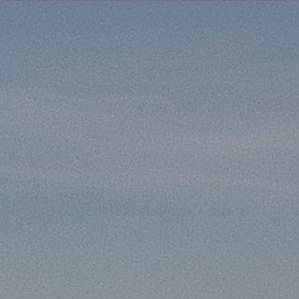

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_3.jpg
The image contains no smoke.
1.4070076e-22


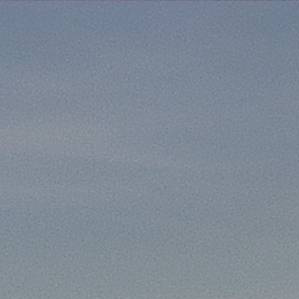

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_4.jpg
The image contains no smoke.
1.0909821e-22


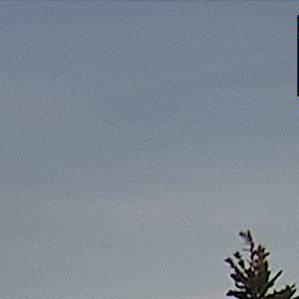

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_5.jpg
The image contains no smoke.
3.3325422e-11


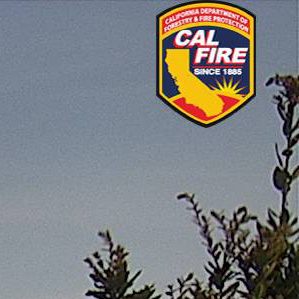

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_6.jpg
The image contains no smoke.
0.00082075596


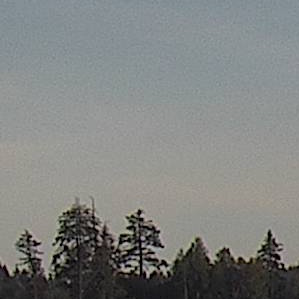

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_7.jpg
The image contains no smoke.
2.2189754e-06


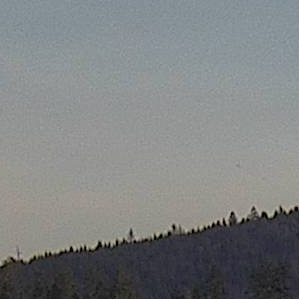

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_8.jpg
The image contains no smoke.
0.000102811304


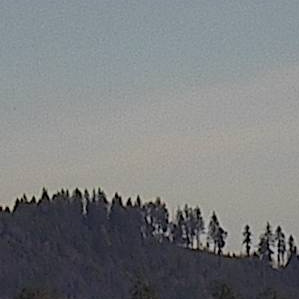

C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn\splitted_9.jpg
The image contains no smoke.
0.20724398


In [14]:
# Get predictions on a directory of 299x299 images
import os
from PIL import Image
import cv2 
from IPython.display import display
from tensorflow.keras.applications.xception import preprocess_input


#directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\easytest' # clear images that the model has likely seen
# directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\hardtest' # difficult, unseen images 
directory = r'C:\Users\mthor\Bootcamp\Wildfire-Detection\Margaret\deerhorn' # subimages from Deerhorn webcam image 

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        name = os.path.join(directory, filename)
        displayMyImage(name)
        print(name)
        getMyPrediction(name,model)
    else:
        continue